In [5]:
## Importing libraries, creating dataFrame and reading the dataset
import pandas as pd
import numpy as np
import seaborn as sns
##import matplotlib.pyplot as plt

import os

df = pd.read_csv('2020_incident_with_zipcode.csv')
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,ZipCode
0,221467363,12/07/2020,05:50:00,BRONX,40,0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1020183,239283,40.823387,-73.870170,POINT (-73.87017045 40.82338729100008),10473
1,213923358,06/06/2020,21:00:00,BRONX,47,0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1009548,258693,40.876699,-73.908523,POINT (-73.90852293799998 40.87669883700005),10463
2,217218947,08/30/2020,01:39:00,BROOKLYN,73,0,NaN,False,NaN,NaN,NaN,45-64,F,BLACK,1025754,268697,40.904095,-73.849860,POINT (-73.84985952299998 40.90409529500005),10470
3,216209200,08/05/2020,20:01:00,QUEENS,104,0,PVT HOUSE,False,18-24,M,UNKNOWN,25-44,F,BLACK HISPANIC,1051162,155661,40.593685,-73.759070,POINT (-73.75907037999998 40.59368532700007),11692
4,221795938,12/13/2020,16:00:00,BROOKLYN,75,0,NaN,False,NaN,NaN,NaN,25-44,F,BLACK,1008427,183518,40.670366,-73.912847,POINT (-73.91284696199995 40.670366460000025),11212


In [6]:
## Droping the unwanted columns

to_drop = ['LOCATION_DESC','PRECINCT','STATISTICAL_MURDER_FLAG','PERP_AGE_GROUP','VIC_SEX','VIC_RACE','X_COORD_CD','Y_COORD_CD'
          ,'Latitude','Longitude','New Georeferenced Column']

df.drop(to_drop, inplace=True, axis=1)

In [ ]:
## Checking if the incident key is unique or not
df['INCIDENT_KEY'].is_unique

In [7]:
## Removing all the duplicate entries

df = df.drop_duplicates()

<AxesSubplot:>

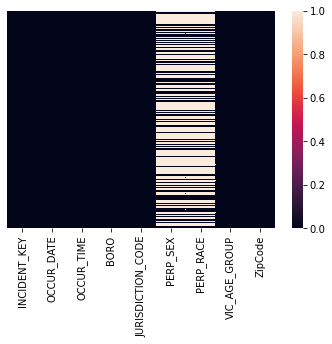

In [8]:
## Anazling NaN values using the heatMap

sns.heatmap(df.isnull(), yticklabels = False)

In [18]:
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,JURISDICTION_CODE,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,ZipCode
0,221467363,12/07/2020,05:50:00,BRONX,0,NaN,NaN,18-24,10473
1,213923358,06/06/2020,21:00:00,BRONX,0,NaN,NaN,18-24,10463
2,217218947,08/30/2020,01:39:00,BROOKLYN,0,NaN,NaN,45-64,10470
4,221795938,12/13/2020,16:00:00,BROOKLYN,0,NaN,NaN,25-44,11212
5,214607781,06/25/2020,19:58:00,MANHATTAN,0,M,WHITE HISPANIC,18-24,10027
...,...,...,...,...,...,...,...,...,...
1935,207815138,01/10/2020,03:38:00,MANHATTAN,0,NaN,NaN,25-44,11203
1936,216263383,08/06/2020,22:48:00,BROOKLYN,0,NaN,NaN,25-44,11236
1937,221490197,12/07/2020,20:11:00,BROOKLYN,0,M,BLACK,18-24,11213
1938,215643885,07/22/2020,17:59:00,BROOKLYN,2,NaN,NaN,18-24,11206


In [13]:
## Droping all the entries which contain NaN.

df2 = df.dropna()

<AxesSubplot:>

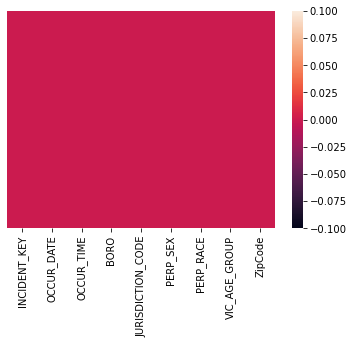

In [14]:
## ReChecking NaN values using the heatMap

sns.heatmap(df2.isnull(), yticklabels = False)

In [17]:
## Droping all the entries in which the column PERP_SEX contains : UNKNOWN.

df2.drop(df2[df2['PERP_RACE'] == 'UNKNOWN'].index, inplace = True)

/Users/shreyasumare/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
df2

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,JURISDICTION_CODE,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,ZipCode
5,214607781,06/25/2020,19:58:00,MANHATTAN,0,M,WHITE HISPANIC,18-24,10027
11,208237500,01/20/2020,04:50:00,MANHATTAN,0,M,BLACK HISPANIC,45-64,10467
12,214513453,06/23/2020,19:15:00,STATEN ISLAND,0,M,WHITE HISPANIC,<18,10472
16,217256574,08/31/2020,14:55:00,BRONX,0,M,BLACK,25-44,10470
18,213972320,06/08/2020,15:00:00,QUEENS,0,M,BLACK HISPANIC,45-64,10032
...,...,...,...,...,...,...,...,...,...
1927,217495446,09/04/2020,20:51:00,BRONX,0,M,BLACK,25-44,11372
1928,213972320,06/08/2020,15:00:00,QUEENS,0,M,BLACK HISPANIC,18-24,11205
1932,219368182,10/16/2020,23:13:00,QUEENS,0,F,WHITE HISPANIC,25-44,10457
1937,221490197,12/07/2020,20:11:00,BROOKLYN,0,M,BLACK,18-24,11213


In [20]:
## saving the cleaned CSV file.
df2.to_csv(r'historic_incident_with_zipcode2020_cleaned.csv')